In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from plot_utils import *
import csv

model = "gpt-4o"
file_name = f"results/{model}_oed_direct_eig_by_obs_wide.csv"
print(file_name)


results/gpt-4o_oed_direct_eig_by_obs_wide.csv


In [46]:
# read the csv file with csv.reader
with open(file_name, 'r') as file:
    reader = csv.reader(file)
    data = list(reader)
print(data[0])

['Environment_', 'Prior_', 'CI_95_0', 'CI_95_1', 'CI_95_3', 'CI_95_5', 'CI_95_7', 'CI_95_10', 'Mean_Value_0', 'Mean_Value_1', 'Mean_Value_3', 'Mean_Value_5', 'Mean_Value_7', 'Mean_Value_10']


In [47]:
# remove the header row
data = data[1:]

In [48]:
# only keep where col 2 is True
prior_data = [d for d in data if d[1] == "True"]
no_prior_data = [d for d in data if d[1] == "False"]

In [49]:
environment = "hyperbolic_temporal_discount"
env_prior_data = [d for d in prior_data if d[0] == environment]
env_no_prior_data = [d for d in no_prior_data if d[0] == environment]

In [50]:
errs = [[float(d[8+i]) for i in range(6)] for d in env_prior_data]
stderrs = [[float(d[2+i]) /1.96 for i in range(6)] for d in env_prior_data]
errs_no_prior = [[float(d[8+i]) for i in range(6)] for d in env_no_prior_data]
stderrs_no_prior = [[float(d[2+i]) /1.96 for i in range(6)] for d in env_no_prior_data]


In [51]:
errs

[[0.015096742884009745,
  0.019269392051200308,
  0.02615861762840087,
  0.07138515132792153,
  0.20428818598052728,
  0.08284915115468791]]

In [52]:
means1 = errs[0]
ci1 = stderrs[0]
if len(errs_no_prior) > 0:
    means2 = errs_no_prior[0]
    ci2 = stderrs_no_prior[0]
    x_labels = ["Prior", "No Prior"]
else:
    means2 = None
    ci2 = None
    x_labels = ["Prior"]
print(means1)
print(ci1)
print(means2)
print(ci2)


[0.015096742884009745, 0.019269392051200308, 0.02615861762840087, 0.07138515132792153, 0.20428818598052728, 0.08284915115468791]
[0.004107856280938786, 0.006570746457560601, 0.0068568631235684544, 0.010888273862388905, 0.017189487245399985, 0.008961378915266013]
[0.0788156800461278, 0.06629791936154412, 0.07047191076250708, 0.06177096517165004, 0.06006847617613483, 0.04312273272879563]
[0.004185017155172175, 0.010717862727224381, 0.010938488373988642, 0.012132902321053182, 0.013877956105624742, 0.011832412470775914]


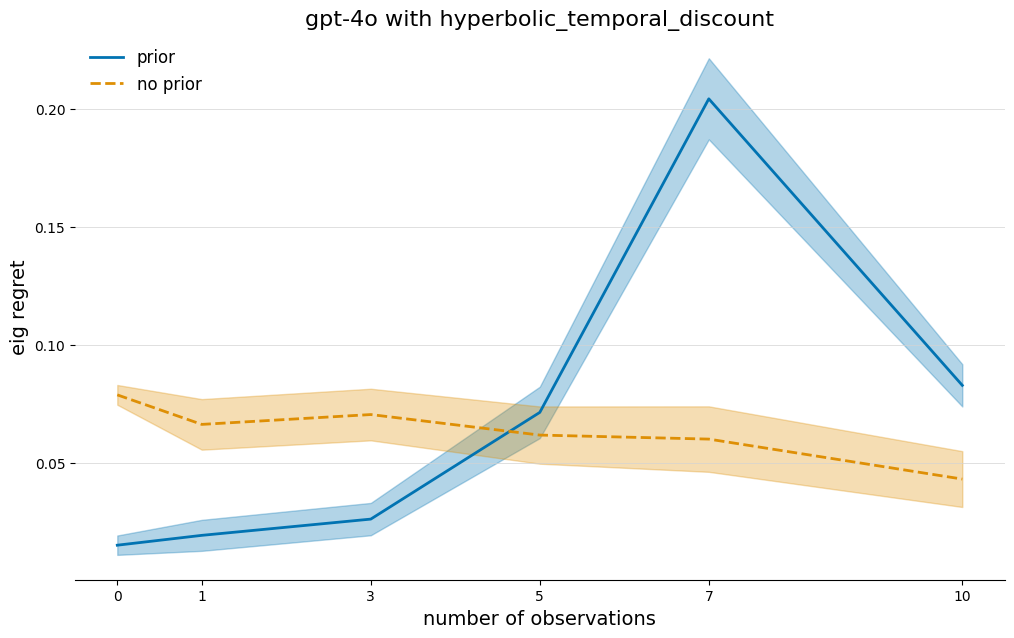

In [53]:
plot_lines([0, 1, 3, 5, 7, 10], means1, ci1, means2, ci2, "prior", "no prior", "number of observations", "eig regret", f"{model} with {environment}", f"eig_pnp{model}_{environment}.png")